# Lecture 03
## Created Date: 08/11/2024

# Classification


In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression

In [3]:

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
# Convert to a pandas DataFrame for better handling
data = pd.DataFrame(X, columns=iris.feature_names)
data['target'] = y

# Display the first few rows of the dataset
print(data.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [5]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


In [6]:
data['target'].value_counts()


,count
target,
0,50
1,50
2,50


## Binary Classification

In [7]:
# Convert the dataset to a binary classification problem (e.g., classifying class 0 vs. class 1)
binary_data = data[data['target'] != 2]
X_binary = binary_data.drop(columns='target')
y_binary = binary_data['target']

In [8]:
# Split the dataset into training and testing sets
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_binary, y_binary, test_size=0.3, random_state=42)


In [9]:
# Scale the features
scaler = StandardScaler()
X_train_bin = scaler.fit_transform(X_train_bin)
X_test_bin = scaler.transform(X_test_bin)

In [10]:
# For binary classification
print("Binary Classification Class Distribution:")
print(y_train_bin.value_counts())

Binary Classification Class Distribution:
target
1    37
0    33
Name: count, dtype: int64


In [11]:
# For binary classification
print("Binary Classification Class Distribution:")
print(y_test_bin.value_counts())

Binary Classification Class Distribution:
target
0    17
1    13
Name: count, dtype: int64


In [12]:
# Train a logistic regression model for binary classification
log_reg_bin = LogisticRegression()
log_reg_bin.fit(X_train_bin, y_train_bin)

LogisticRegression()

In [13]:
# Make predictions
y_pred_bin = log_reg_bin.predict(X_test_bin)
# Get the predicted probabilities
probabilities = log_reg_bin.predict_proba(X_test_bin)

In [14]:
print(y_pred_bin)


[1 1 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 0 1 0 1]


In [15]:
print(probabilities)

[[0.00215447 0.99784553]
 [0.0103269  0.9896731 ]
 [0.00606254 0.99393746]
 [0.95540002 0.04459998]
 [0.97712604 0.02287396]
 [0.97749594 0.02250406]
 [0.99513934 0.00486066]
 [0.0261362  0.9738638 ]
 [0.98363125 0.01636875]
 [0.9836828  0.0163172 ]
 [0.97089258 0.02910742]
 [0.96594588 0.03405412]
 [0.01002137 0.98997863]
 [0.99457083 0.00542917]
 [0.01742037 0.98257963]
 [0.98837997 0.01162003]
 [0.00238526 0.99761474]
 [0.00159117 0.99840883]
 [0.97287291 0.02712709]
 [0.94793948 0.05206052]
 [0.01513671 0.98486329]
 [0.03921643 0.96078357]
 [0.96347121 0.03652879]
 [0.98723484 0.01276516]
 [0.02630549 0.97369451]
 [0.99191819 0.00808181]
 [0.98306037 0.01693963]
 [0.02546963 0.97453037]
 [0.97304735 0.02695265]
 [0.00152566 0.99847434]]


## Evaluating the Model

In [16]:
from sklearn.metrics import confusion_matrix

In [17]:
# Compute the confusion matrix
cm = confusion_matrix(y_test_bin, y_pred_bin)
print(cm)


[[17  0]
 [ 0 13]]


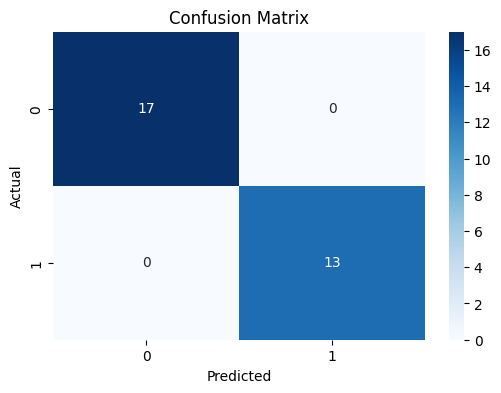

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,cmap="Blues")
#sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [20]:
print("Logistic Regression (Binary) Evaluation:")
print("Accuracy:", accuracy_score(y_test_bin, y_pred_bin))
print("Precision:", precision_score(y_test_bin, y_pred_bin))
print("Recall:", recall_score(y_test_bin, y_pred_bin))

Logistic Regression (Binary) Evaluation:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0


## Multiclass classification

In [21]:
# For multiclass classification, we will use the original dataset
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X, y, test_size=0.3, random_state=42)

# Scale the features
X_train_multi = scaler.fit_transform(X_train_multi)
X_test_multi = scaler.transform(X_test_multi)

# Train a logistic regression model for multiclass classification
log_reg_multi = LogisticRegression(multi_class='ovr')
log_reg_multi.fit(X_train_multi, y_train_multi)

# Make predictions
y_pred_multi = log_reg_multi.predict(X_test_multi)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


In [22]:
cm_multi = confusion_matrix(y_test_multi, y_pred_multi)
print("Confusion Matrix:\n", cm_multi)

Confusion Matrix:
 [[19  0  0]
 [ 0  9  4]
 [ 0  0 13]]


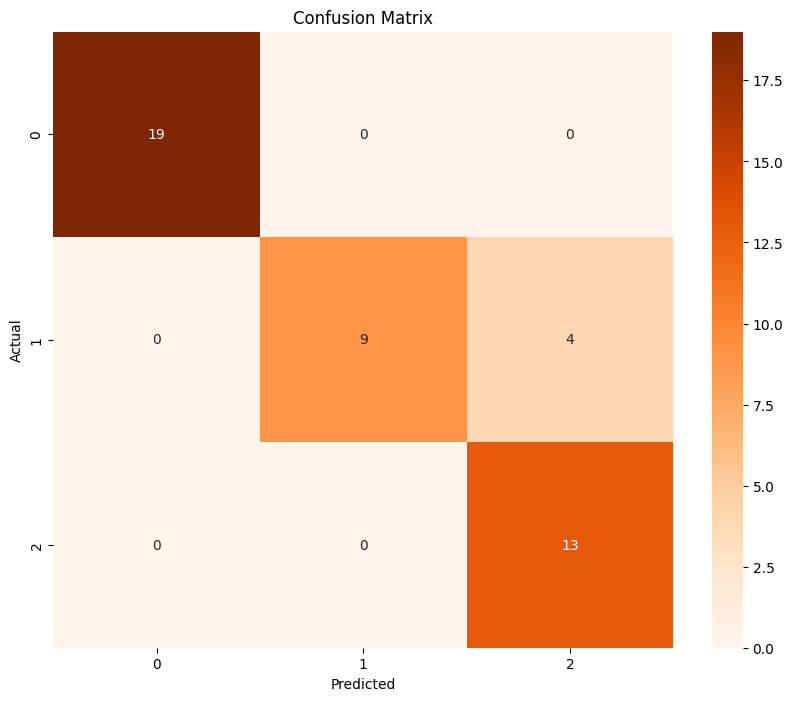

In [47]:
# Visualize the confusion matrix
plt.figure(figsize=(10,8))
sns.heatmap(cm_multi, annot=True,cmap="Oranges")
#sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [41]:
from sklearn.metrics import classification_report

# Assuming y_test_multi is the true labels and y_pred_multi is the predicted labels
report = classification_report(y_test_multi, y_pred_multi)

# Print the classification report
print(report)

#Home Work What is f1-score??

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.69      0.82        13
           2       0.76      1.00      0.87        13

    accuracy                           0.91        45
   macro avg       0.92      0.90      0.89        45
weighted avg       0.93      0.91      0.91        45



## KNN Model

In [32]:
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Convert to DataFrame for better readability
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target_names[iris.target]
#iris_df['species'] = iris.target
print("First few rows of the Iris dataset:")
print(iris_df.head())

First few rows of the Iris dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


In [33]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and fit the scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
# Initialize the k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=2)

# Fit the model
knn.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test_scaled)

# Print accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f'\nAccuracy: {accuracy:.2f}')


Accuracy: 0.98


In [35]:
# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

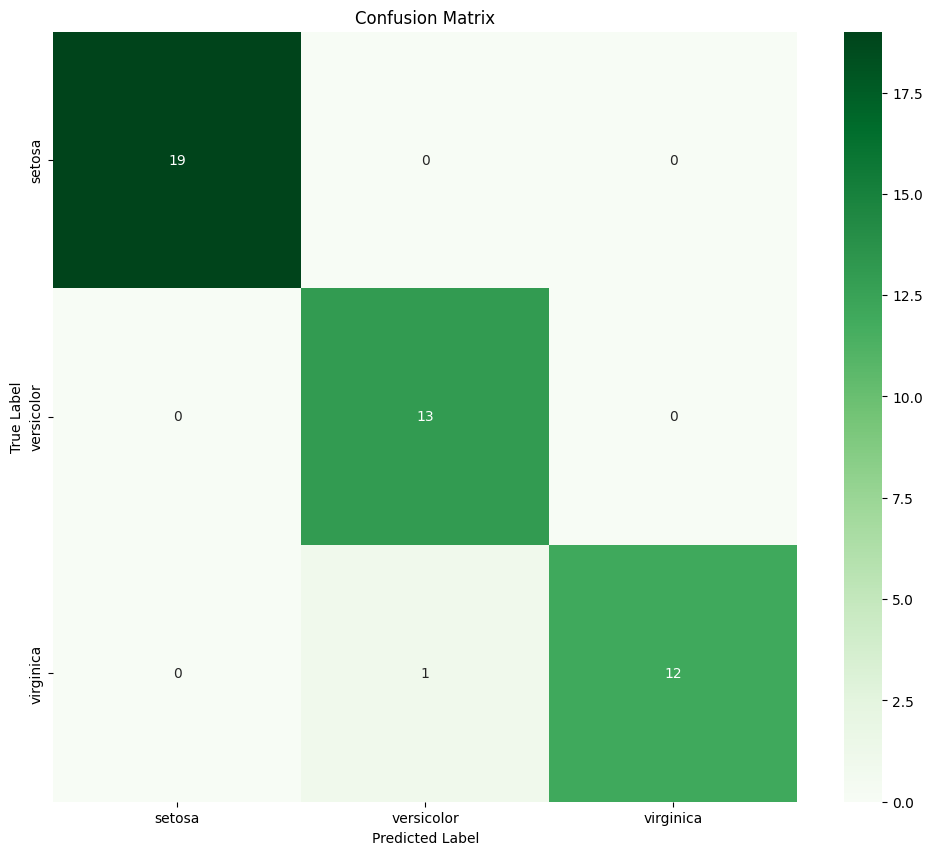

In [48]:
# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens',
            xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Decision Trees and Random Forests

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
file_path = '/content/drive/MyDrive/lecture_3_ML/car.data'
df = pd.read_csv(file_path, header = None)

In [54]:
# view dimensions of dataset

df.shape

(1728, 7)

In [55]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### Rename column names

In [57]:


col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [58]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


We can see that the column names are renamed. Now, the columns have meaningful names.

CAR car acceptability . . buying buying price . . maint price of the maintenance . . . doors number of doors . . . persons capacity in terms of persons to carry . . . lug_boot the size of luggage boot . . safety estimated safety of the car

## View summary of dataset

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB
